### Lab6. Predictive Analytics for Hospitals 

### Step1. [Import dataset] 
#### Using Pandas, import “diabetes.csv” file and print properties such as head, shape, columns, dtype, info and value_counts. 

In [1]:
import pandas as pd
import csv

In [2]:
diab=pd.read_csv("diabetes.csv")
diab

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
diab.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
diab.shape

(768, 9)

In [5]:
df = pd.read_csv("diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [6]:
dia1 = df.columns
dia1

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [7]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

### Step2. [Identify relationships between feature] 
#### Create a Heatmap for the dataset and understand the data 

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<AxesSubplot:>

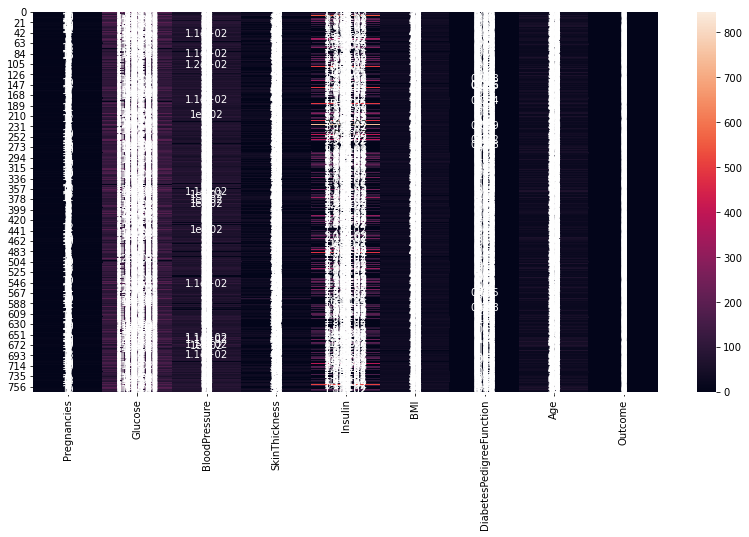

In [9]:
plt.figure(figsize=(14,7))
sns.heatmap(data=df,annot=True)

### Step3. [Prediction using one feature]
#### Will older people become diabetic? 
#### Create LogisticRegression model, train with “Age” as X and “Outcome” feature as y. 

In [10]:
X=df[["Age"]]
y=df[["Outcome"]]

In [11]:
X

,Age
0,50
1,31
2,32
3,21
4,33
...,...
763,63
764,27
765,30
766,47


In [12]:
y

,Outcome
0,1
1,0
2,1
3,0
4,1
...,...
763,0
764,0
765,0
766,1


In [13]:
from sklearn.linear_model import LogisticRegression

In [14]:
logmodel = LogisticRegression()

In [15]:
logmodel.fit(X,y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression()

###  Print model parameter values: coef_ and intercept_ 

### coef_ 

In [16]:
logmodel.coef_

array([[0.04202466]])

### intercept_

In [17]:
logmodel.intercept_

array([-2.04744865])

### Query: A person is 60 years old. Will he be diabetic? 

In [24]:
log = logmodel.coef_ * 60 + logmodel.intercept_
from scipy.special import expit
if expit(log) > 0.5:
    print(expit(log))
    print('YES, he will become diabetic')
else:
    print("NO, he will not be diabetic")

[[0.61633741]]
YES, he will become diabetic


In [25]:
logmodel.predict([[60]])

array([1], dtype=int64)

### Step4. [Prediction using many features] 
#### Will Glucose, BMI and Age values make someone diabetic? 
### Select the three features 'Glucose', 'BMI' and 'Age' from your dataset, call it as X

In [39]:
_X=df[["Glucose","BMI","Age"]]
_X

,Glucose,BMI,Age
0,148,33.6,50
1,85,26.6,31
2,183,23.3,32
3,89,28.1,21
4,137,43.1,33
...,...,...,...
763,101,32.9,63
764,122,36.8,27
765,121,26.2,30
766,126,30.1,47


###  Create a new LogisticRegression model, train with X and ‘Outcome’ as y.

In [40]:
y=df[["Outcome"]]
y

,Outcome
0,1
1,0
2,1
3,0
4,1
...,...
763,0
764,0
765,0
766,1


In [41]:
logmodel1 = LogisticRegression()

In [42]:
logmodel1.fit(_X,y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression()

In [43]:
logmodel1.predict([[40,30,150]])

array([0], dtype=int64)

In [44]:
logmodel1.coef_

array([[0.03251154, 0.08157404, 0.03015421]])

In [45]:
logmodel1.intercept_

array([-8.39311252])

In [52]:
log1 = logmodel1.coef_[0][0] * 40 + logmodel1.coef_[0][1] *30 + logmodel1.coef_[0][2] *150 + logmodel1.intercept_
from scipy.special import expit
if expit(log1) > 0.5:
    print(expit(log1))
    print('YES, he will become diabetic')
else:
    print("NO, he will not be diabetic")

NO, he will not be diabetic


In [49]:
logmodel1.predict_proba([[150,30,40]])

array([[0.46580162, 0.53419838]])

### Step5. [Build LoR model with all features] 
#### Create LoR model, train it with X_train and y_train values 

In [53]:
X_lor = df.drop('Outcome',axis=1)

In [54]:
logmodel2 = LogisticRegression()

In [55]:
from sklearn.model_selection import train_test_split

In [57]:
X_train,X_test,y_train,y_test = train_test_split(X_lor,y,train_size=0.8,test_size=0.2)

In [58]:
logmodel2.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [59]:
y_test

,Outcome
143,1
579,1
764,0
313,0
426,0
...,...
437,0
285,0
62,0
513,0


In [60]:
y_predict = logmodel2.predict(X_test)
y_predict

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0],
      dtype=int64)

####  Now, compute and print its AUC value 

In [61]:
from sklearn.metrics import roc_auc_score

In [63]:
print("LoR AUC  ",roc_auc_score(y_test,y_predict))

LoR AUC   0.7733785822021116


### Step6. [Forward Selection Procedure] 

In [64]:
type(df.columns)

pandas.core.indexes.base.Index

In [65]:
def auc(var,tar,df):
    fX = df[var]
    fy = df[tar]
    logreg = LogisticRegression()
    logreg.fit(fX,fy)
    pred=logreg.predict_proba(fX)[:,1]
    auc_val = roc_auc_score(y,pred)
    return auc_val

In [66]:
auc(["BMI","Glucose"],["Outcome"],df)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


0.8109328358208956

In [67]:
auc(['Pregnancies', 'BloodPressure', 'SkinThickness'],["Outcome"],df)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


0.6444962686567164

In [68]:
def next_best(current,cand,tar,df):
    best_auc = -1
    best_var = None
    for i in cand:
        auc_v = auc(current+[i],tar,df)
        if auc_v>=best_auc:
            best_auc = auc_v
            best_var = i
    return best_var        

In [70]:
tar = ["Outcome"]
current = ['Insulin','BMI', 'DiabetesPedigreeFunction', 'Age']
cand = ['Pregnancies', 'BloodPressure', 'SkinThickness'] 
next_var = next_best(current,cand,tar,df)
print(next_var)

SkinThickness


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [72]:
tar = ["Outcome"]
current = []
cand = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age']
max_num = 5 
num_it = min(max_num,len(cand))
for i in range(0,num_it):
    next_var = next_best(current,cand,tar,df)
    current = current + [next_var]
    cand.remove(next_var)
    print("Variable added in step " + str(i+1)  + " is " + next_var + ".")
print(current)    

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

Variable added in step 1 is Glucose.
Variable added in step 2 is BMI.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**


Variable added in step 3 is Pregnancies.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**


Variable added in step 4 is DiabetesPedigreeFunction.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**


Variable added in step 5 is BloodPressure.
['Glucose', 'BMI', 'Pregnancies', 'DiabetesPedigreeFunction', 'BloodPressure']


### Step7. [Plot Line graph of AUC values and select cut-off]

In [73]:
X_train,X_test,y_train,y_test = train_test_split(X_lor,y,test_size = 0.5,stratify =y)

In [74]:
predict = logmodel2.predict_proba(X_test)

In [75]:
train = pd.concat([X_train,y_train], axis=1)
test = pd.concat([X_test,y_test], axis=1)

In [76]:
def auc_train_test(variables,target,train,test):
    X_train = train[variables]
    X_test = test[variables]
    Y_train = train[target]
    Y_test = test[target]
    log_reg = LogisticRegression()
    
    # Fit the model on train data
    log_reg.fit(X_train, Y_train)
    
    # Calculate the predictions both on train and test data
    predictions_train = log_reg.predict_proba(X_train)[:,1]
    predictions_test = log_reg.predict_proba(X_test)[:,1]
    
    # Calculate the AUC both on train and test data
    auc_train = roc_auc_score(Y_train, predictions_train)
    auc_test = roc_auc_score(Y_test,predictions_test)
    return(auc_train, auc_test)

In [77]:
auc_values_train = []
auc_values_test = []
variables_evaluate = []

# Iterate over the variables in variables
for v in X_lor.columns:
  
    # Add the variable
    variables_evaluate.append(v)
    
    # Calculate the train and test AUC of this set of variables
    auc_train, auc_test = auc_train_test(variables_evaluate,["Outcome"],train,test)
    
    # Append the values to the lists
    auc_values_train.append(auc_train)
    auc_values_test.append(auc_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

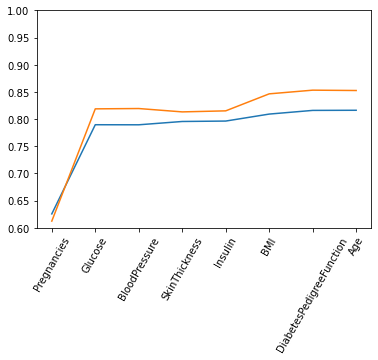

In [79]:
import matplotlib.pyplot as plt
import numpy as np

x = np.array(range(0,len(auc_values_train)))
my_train = np.array(auc_values_train)
my_test = np.array(auc_values_test)
plt.xticks(x,X_lor.columns,rotation=60)
plt.plot(x,my_train)
plt.plot(x,my_test)
plt.ylim((0.6,1.0))
plt.show()

### Step8. [Draw Cumulative Gain Chart and Lift Chart]

In [83]:
!pip install scikit-plot

distutils: c:\programdata\anaconda3\Include\UNKNOWN
sysconfig: c:\programdata\anaconda3\Include
user = False
home = None
root = None
prefix = None
distutils: c:\programdata\anaconda3\Include\UNKNOWN
sysconfig: c:\programdata\anaconda3\Include
user = False
home = None
root = None
prefix = None


In [84]:
import scikitplot as skplt

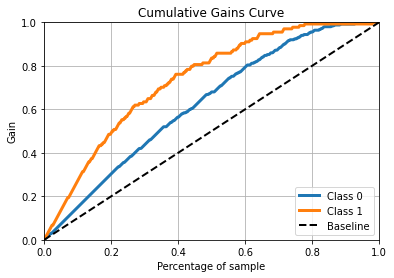

In [85]:
skplt.metrics.plot_cumulative_gain(y_test,predict)
plt.show()

<Figure size 504x504 with 0 Axes>

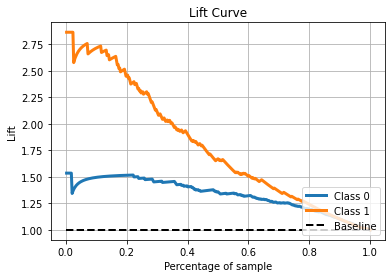

In [86]:
plt.figure(figsize=(7,7))
skplt.metrics.plot_lift_curve(y_test,predict)
plt.show()